# Connected components

In a graph with a single connected component, a path can be found connecting any pair of vertices. 

1. This task will explore experimentally finding out how many random edges need to be added in a random graph with a given number of vertices until a single connected component is obtained.
2. A plot should be produced that shows for growing numbers of initial vertices how many edges had to be added.
3. Since we are dealing with a randomized experiment results should show the average outcome of a given number of independent experiments (consider a sample size of at least 30).

Suggested tools:
- Python
- NetworkX, https://networkx.github.io
- Gnuplot, matplotlib, or similar graphing tools with PDF outputs

In [79]:
from math import exp
import networkx as nx
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def graphing(num_nodes):
    # Creates a graph
    graph = nx.Graph()
    
    # Adds nodes to graph
    for n in range(num_nodes):
        graph.add_node(n)
    
    # Adds edges randomly until graph is fully connected
    while not nx.is_connected(graph):
        possible_edges = list(nx.non_edges(graph))
        edge = random.choice(possible_edges)
        graph.add_edge(edge[0], edge[1])
    
    return graph

NODES: 10
EDGES: 11


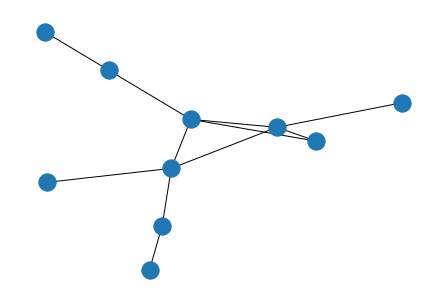

In [80]:
# 1. How many random edges need to be added in a random graph with a given number of vertices until a single connected component is obtained.

num_nodes = 10
graph = graphing(num_nodes)
nx.draw(graph)
print("NODES: %d\nEDGES: %d" % (num_nodes, graph.number_of_edges()))

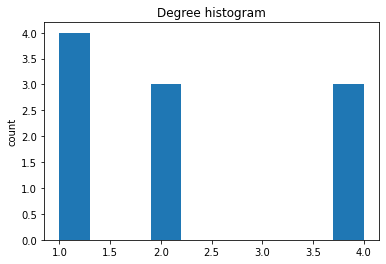

In [81]:
data = [graph.degree[n] for n in range(graph.number_of_nodes())]
plt.hist(data)
plt.title('Degree histogram')
plt.xlabel('')
plt.ylabel('count')
plt.show()

NODES: 1 - EDGES: 0.00
NODES: 2 - EDGES: 1.00
NODES: 3 - EDGES: 2.00
NODES: 4 - EDGES: 3.17
NODES: 5 - EDGES: 4.43
NODES: 6 - EDGES: 6.27
NODES: 7 - EDGES: 7.03
NODES: 8 - EDGES: 9.27
NODES: 9 - EDGES: 10.83
NODES: 10 - EDGES: 12.67
NODES: 11 - EDGES: 14.13
NODES: 12 - EDGES: 16.17
NODES: 13 - EDGES: 17.50
NODES: 14 - EDGES: 21.40
NODES: 15 - EDGES: 20.63
NODES: 16 - EDGES: 23.53
NODES: 17 - EDGES: 25.63
NODES: 18 - EDGES: 28.53
NODES: 19 - EDGES: 29.37
NODES: 20 - EDGES: 33.87
NODES: 21 - EDGES: 34.60
NODES: 22 - EDGES: 36.77
NODES: 23 - EDGES: 41.20
NODES: 24 - EDGES: 41.97
NODES: 25 - EDGES: 49.50
NODES: 26 - EDGES: 46.87
NODES: 27 - EDGES: 49.73
NODES: 28 - EDGES: 49.50
NODES: 29 - EDGES: 49.70
NODES: 30 - EDGES: 51.20


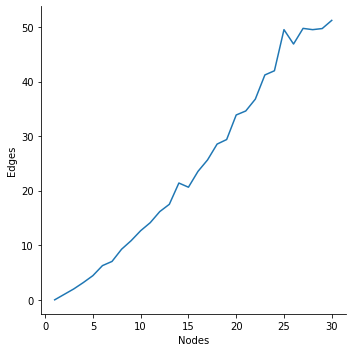

In [82]:
# 2. For growing numbers of initial vertices how many edges had to be added.

nodes = [n for n in range(1, 31)]
samples = 50
edges = []

for n in nodes:
    total_edges = 0.0
    for i in range(samples):
        total_edges += graphing(n).number_of_edges()
    edges.append(total_edges/samples)
    print("NODES: %d - EDGES: %.2f" % (n, edges[-1]))


df = pd.DataFrame()
df['Nodes'] = nodes
df['Edges'] = edges

sns.relplot(
    data=df, x="Nodes", y="Edges", kind="line",
)